# Prediction using Supervised ML
            (Level - Beginner)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3> Question : </h3>

<p>Predict the percentage of a student score based on the number of study hours.</p>
</div>


This is a simple linear regression task as it involves just two variables.

In [1]:
# All Libraries required for this lab are listed below.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Importing Data Sets


In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
# getting the first five numbers
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Visualization

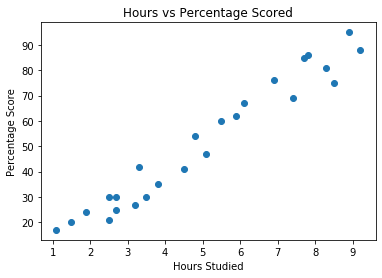

In [3]:
#using scatter plot
x=df[["Hours"]]
y=df[["Scores"]]
plt.pyplot.scatter(x, y)
plt.pyplot.xlabel("Hours Studied")
plt.pyplot.ylabel("Percentage Score")
plt.pyplot.title("Hours vs Percentage Scored")

plt.pyplot.show()

The graph shows that there is a positive linear relationship between the number of hour studied and percentage of score

### Preparing the data
Divide the data into attributes(inputs) and labels(outputs)

In [4]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

<h2 id="ref1">Training and Testing</h2>

<p>An important step in testing your model is to split your data into training and testing data.</p>


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)
print("number of test samples:", X_test.shape[0])
print("number of training sample:", X_train.shape[0])

number of test samples: 5
number of training sample: 20


### Training the Algorithm

In [6]:
#create linear regression object
lm = LinearRegression()

In [7]:
# Fit the linear model  
lm.fit(X_train, y_train) 
print("Training complete.")

Training complete.


<h3>Model Evaluation Using Visualization</h3>


In [8]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h4>Regression Plot</h4>


<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>


(0, 101.95444972153446)

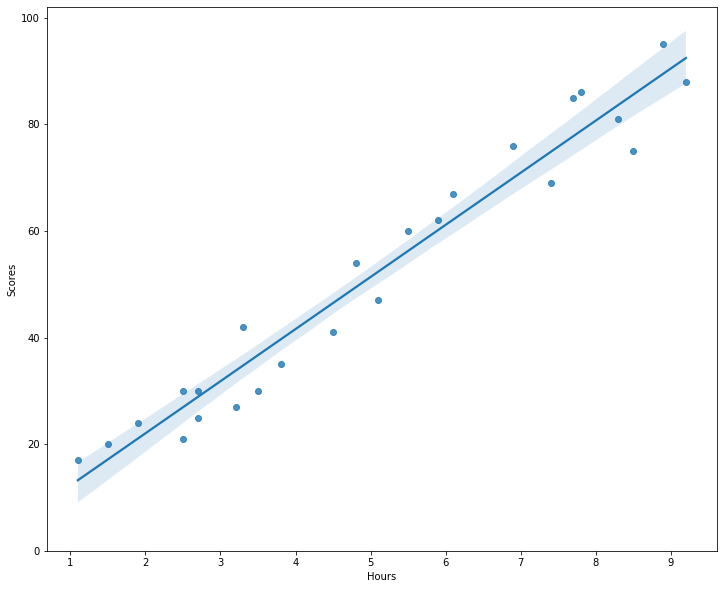

In [9]:
import matplotlib.pyplot as plt
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x = 'Hours', y = 'Scores', data=df)
plt.ylim(0,)

## Making Prediction

In [10]:
# prediction(X)
Yhat = lm.predict(X_test)
Yhat

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [11]:
# Comparing Actual vs Predicted
DF = {"PREDICTED VALUES": Yhat, "ACTUAL VALUES": y_test}  
data = pd.DataFrame(DF)
data

,PREDICTED VALUES,ACTUAL VALUES
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


### Testing with new data

In [13]:
hrs = np.array([5.6]).reshape(-1, 1)
pred = lm.predict(hrs)
print("No of Hours", hrs)
print("Predicted score", pred[0])

No of Hours [[5.6]]
Predicted score 57.517836333031205


### Evaluating the model


<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
mse = mean_squared_error(y_test, Yhat)

In [16]:
mse

21.5987693072174